# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [1]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1




In [2]:
# Import essential libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error



2025-06-01 22:55:24.745291: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-01 22:55:24.746588: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-01 22:55:24.749988: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-01 22:55:24.759672: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748798724.775838  408183 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748798724.78

Load the dataset.

In [3]:
# Load and unzip the dataset

import zipfile

# Define the zip file path and extraction location
zip_file_path = '/home/raghavendra/Downloads/data-20250530T122114Z-1-001.zip'       # Path to the zipped dataset
extract_to_path = '/home/raghavendra/Downloads/'            # Destination folder to unzip into

# Extract the contents of the zip file
if zipfile.is_zipfile(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_path)
    print("Dataset has been extracted successfully.")
else:
    print("Provided file is not a valid zip archive.")


Dataset has been extracted successfully.


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [4]:
# Create a function to load the raw images

def load_images_from_directory(base_dir, target_size=(224, 224)):
    """
    Loads and resizes images from a structured directory where each subfolder represents a class.

    Parameters:
    - base_dir (str): Path to the root 'data/' folder containing class-named subdirectories.
    - target_size (tuple): Desired image size as (width, height).

    Returns:
    - images (np.ndarray): Array of image data.
    - labels (np.ndarray): Corresponding class labels for each image.
    """

    image_data = []
    image_labels = []

    # Loop through each subfolder (class label)
    for label_name in sorted(os.listdir(base_dir)):
        class_dir = os.path.join(base_dir, label_name)

        # Skip non-folder entries
        if not os.path.isdir(class_dir):
            continue

        # Loop through each image file in the class folder
        for filename in os.listdir(class_dir):
            file_path = os.path.join(class_dir, filename)

            try:
                # Load and resize image
                with Image.open(file_path) as img:
                    img = img.convert('RGB')  # Ensure 3 channels
                    img = img.resize(target_size)
                    image_array = np.array(img)

                    image_data.append(image_array)
                    image_labels.append(label_name)

            except Exception as e:
                print(f"Skipped file {file_path}: {e}")

    return np.array(image_data), np.array(image_labels)


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

Loaded 7625 images.
Loaded 7625 labels.
Example image size: (224, 224, 3)

Images per class:
Plastic       2295
Paper         1030
Other         1010
Food_Waste    1000
Metal         1000
Glass          750
Cardboard      540
Name: count, dtype: int64

Labels (Waste Categories):
['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']



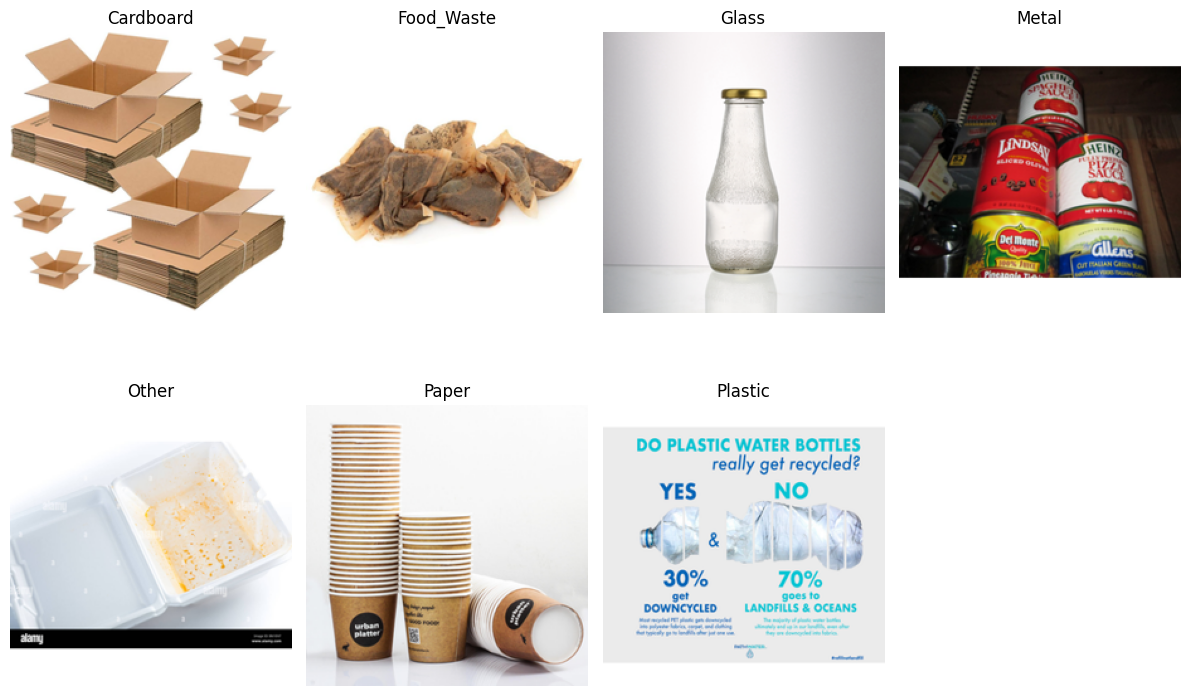

In [5]:
# Get the images and their labels


import os
# Path to the dataset folder
data_path = '/home/raghavendra/Downloads/data'

# Load image data and labels
all_images, all_labels = load_images_from_directory(data_path)

# Print basic info
print("Loaded", len(all_images), "images.")
print("Loaded", len(all_labels), "labels.")
print("Example image size:", all_images[0].shape)



# Check how many images per class
class_counts = pd.Series(all_labels).value_counts()
print("\nImages per class:")
print(class_counts)

# Preview a sample image from each class

classes = np.unique(all_labels)
print("\nLabels (Waste Categories):")
print(classes)
print()
plt.figure(figsize=(12, 8))

for i, class_name in enumerate(classes):
    index = list(all_labels).index(class_name)
    plt.subplot(2, 4, i + 1)
    plt.imshow(all_images[index])
    plt.title(class_name)
    plt.axis("off")

plt.tight_layout()
plt.show()


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

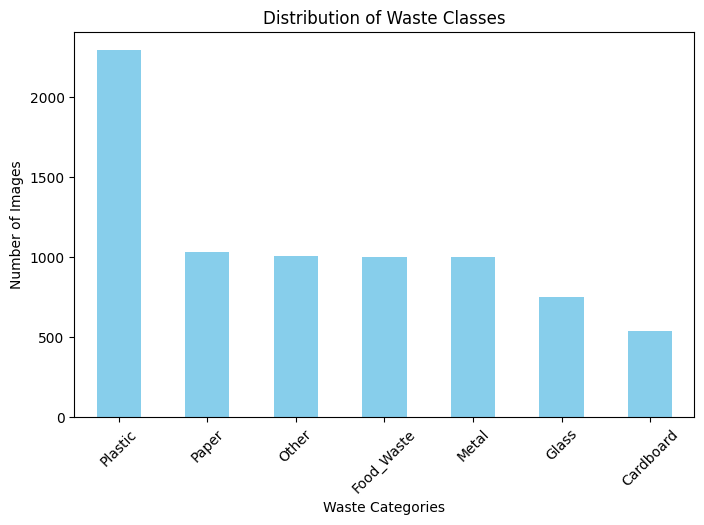

<Figure size 640x480 with 0 Axes>

In [8]:
# Visualise Data Distribution
plt.figure(figsize=(8,5))
ax=class_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Waste Classes')
plt.xlabel('Waste Categories')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)  # Rotate class labels for better readability
plt.show()

# Add count labels on top of each bar
for ind,value in enumerate(class_counts.values):
    ax.text(ind, value + 50, str(value), ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

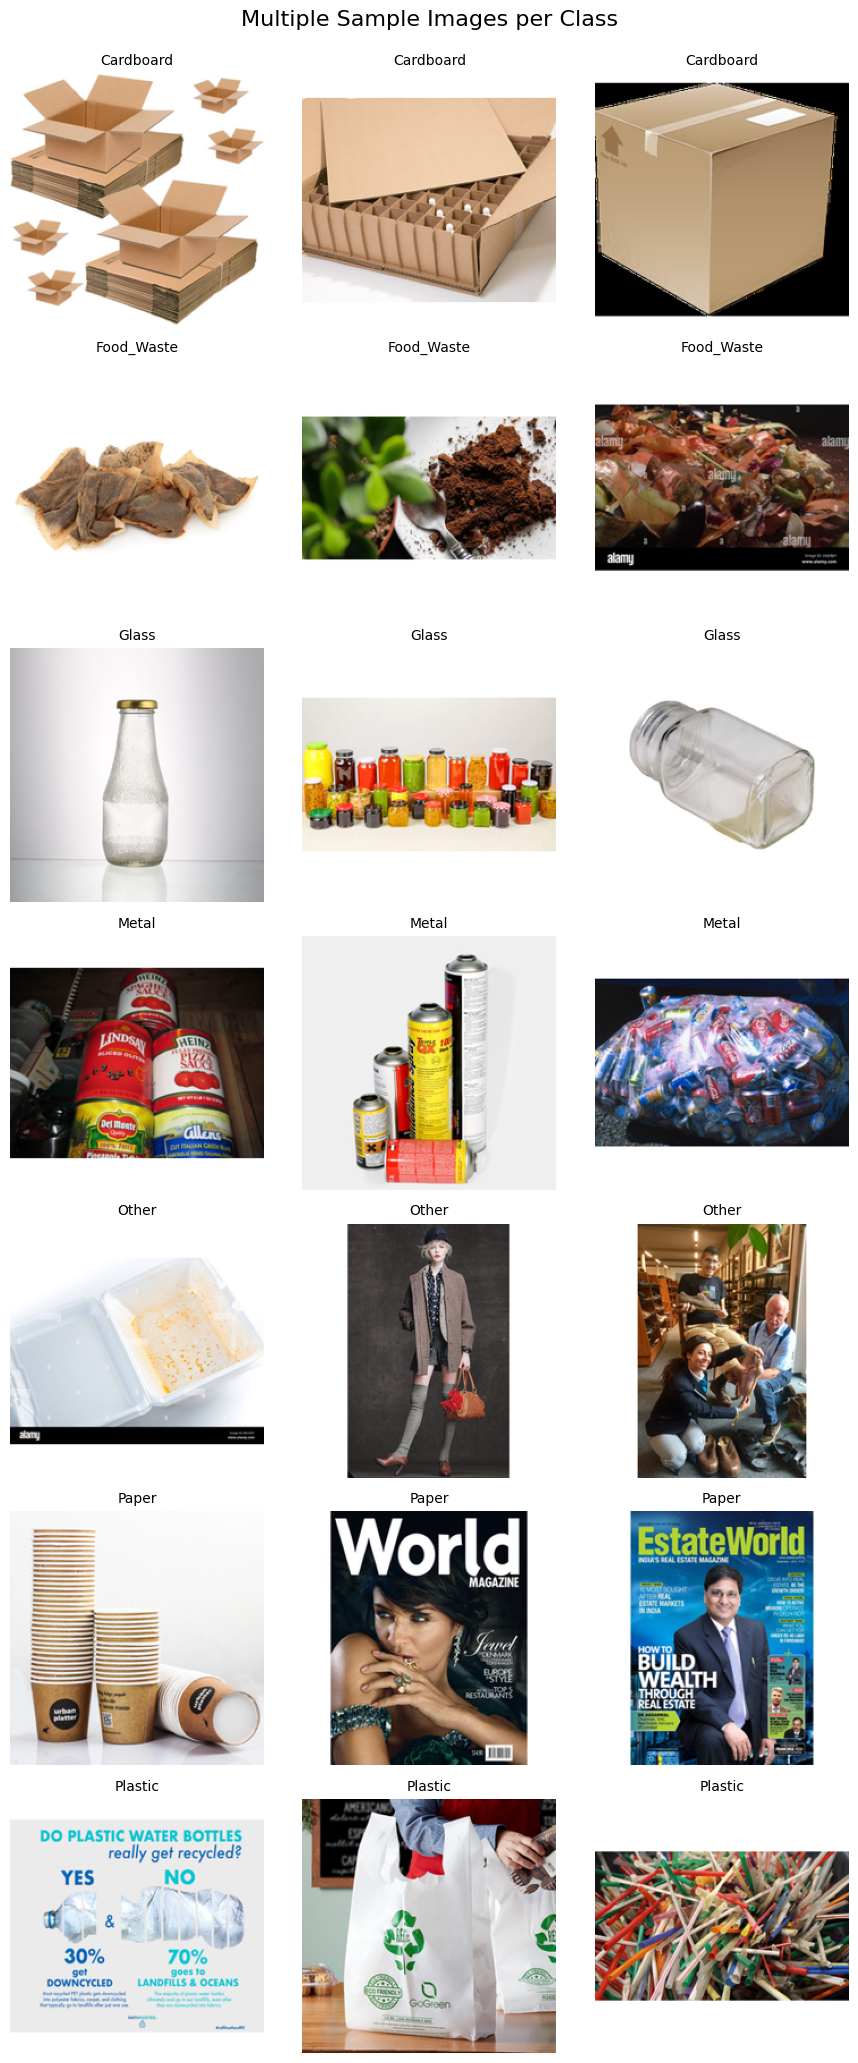

Image dimensions: (224, 224, 3)
Total number of images: 7625


In [9]:
# Visualise Sample Images (across different labels)



import matplotlib.pyplot as plt
import numpy as np

# How many images per class to show
images_per_class = 3

# Set figure size based on number of classes and images
plt.figure(figsize=(images_per_class * 3, len(classes) * 3))

# Loop through each class
for row_idx, label in enumerate(classes):
    # Get all indices for current label
    class_indices = np.where(all_labels == label)[0]

    # Loop to plot specified number of images per class
    for col_idx in range(images_per_class):
        img_idx = class_indices[col_idx]  # Pick the nth image from this class
        plt_idx = row_idx * images_per_class + col_idx + 1  # subplot index

        plt.subplot(len(classes), images_per_class, plt_idx)
        plt.imshow(all_images[img_idx])
        #if col_idx == 0:
         #   plt.ylabel(label, fontsize=12, fontweight='bold')  # Class name on the left
        plt.title(f"{label}", fontsize=10)
        plt.axis('off')
        

        

plt.suptitle("Multiple Sample Images per Class", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# Print image information
print(f"Image dimensions: {all_images[0].shape}")
print(f"Total number of images: {len(all_images)}")



#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [10]:
# Find the smallest and largest image dimensions from the data set

# Extract all image shapes
image_shapes = [img.shape[:2] for img in all_images]  # only (height, width)

# Convert to numpy array for easier manipulation
image_shapes_array = np.array(image_shapes)

# Find min and max dimensions
min_height, min_width = image_shapes_array.min(axis=0)
max_height, max_width = image_shapes_array.max(axis=0)

print(f"Smallest image dimensions: {min_height} x {min_width}")
print(f"Largest image dimensions : {max_height} x {max_width}")

# Check if all images have the same dimensions
if np.all(image_shapes == image_shapes[0]):
    print("All images already have the same dimensions.")
else:
    print("Images have varying dimensions.")


Smallest image dimensions: 224 x 224
Largest image dimensions : 224 x 224
Images have varying dimensions.


In [11]:
# Resize the image dimensions

image_size = (224, 224)
image_channels = 3

# Since we already found that all images have identical dimensions (224x224),
# we don't need to resize them again as they were already resized during loading.
print(f"All images already have consistent dimensions: {image_size[0]}x{image_size[1]}x{image_channels}")

# Confirm the shape of our image dataset
print(f"Image dataset shape: {all_images.shape}")





All images already have consistent dimensions: 224x224x3
Image dataset shape: (7625, 224, 224, 3)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [ ]:
# Encode the labels suitably

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(all_labels)

# Get the class mapping for reference
class_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Class mapping:")
for class_name, class_idx in class_mapping.items():
    print(f"{class_name}: {class_idx}")

# Convert to one-hot encoding for neural network training
one_hot_encoded = tf.keras.utils.to_categorical(encoded_labels)

# Normalize the images (scale pixel values to 0-1)
normalized_imgs = all_images.astype('float32') / 255.0

# Display the shapes of our processed data
print(f"\nNumber of classes: {len(np.unique(labels))}")
print(f"Encoded labels shape: {encoded_labels.shape}")
print(f"One-hot encoded labels shape: {one_hot_labels.shape}")
print(f"Normalized images shape: {normalized_images.shape}")

# Display a sample label in both formats
sample_idx = 0
print(f"\nSample image class: {labels[sample_idx]}")
print(f"Encoded label: {encoded_labels[sample_idx]}")
print(f"One-hot encoded label: {one_hot_labels[sample_idx]}")


Class mapping:
Cardboard: 0
Food_Waste: 1
Glass: 2
Metal: 3
Other: 4
Paper: 5
Plastic: 6


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [11]:
# Assign specified parts of the dataset to train and validation sets


# Split the data (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    normalized_imgs, one_hot_encoded, 
    test_size=0.2, # 20% for validation
    random_state=42, # For reproducibility
    stratify=label_ids  # Ensures class distribution is preserved
)


# Display the shapes of the training and validation sets
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation labels shape: {y_val.shape}")

# Verify class distribution in both sets
train_distribution = pd.Series(np.argmax(y_train, axis=1)).value_counts(normalize=True) * 100
val_distribution = pd.Series(np.argmax(y_val, axis=1)).value_counts(normalize=True) * 100

print("\nClass distribution in training set (%):")
for class_idx, percentage in train_distribution.items():
    class_name = label_encoder.inverse_transform([class_idx])[0]
    print(f"{class_name}: {percentage:.2f}%")

print("\nClass distribution in validation set (%):")
for class_idx, percentage in val_distribution.items():
    class_name = label_encoder.inverse_transform([class_idx])[0]
    print(f"{class_name}: {percentage:.2f}%")

Training set shape: (6100, 224, 224, 3)
Validation set shape: (1525, 224, 224, 3)
Training labels shape: (6100, 7)
Validation labels shape: (1525, 7)

Class distribution in training set (%):
Plastic: 30.10%
Paper: 13.51%
Other: 13.25%
Metal: 13.11%
Food_Waste: 13.11%
Glass: 9.84%
Cardboard: 7.08%

Class distribution in validation set (%):
Plastic: 30.10%
Paper: 13.51%
Other: 13.25%
Food_Waste: 13.11%
Metal: 13.11%
Glass: 9.84%
Cardboard: 7.08%


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [ ]:
# Build and compile the model
# Define the model architecture
def create_waste_segregation_model(input_shape=(224, 224, 3), num_classes=7):
    model = tf.keras.Sequential([
        # Input layer
        layers.Input(shape=input_shape),

        # First Convolutional Block
        layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        # Flatten the output and feed it into dense layer
        layers.Flatten(),

        # Fully connected layers
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        # Output layer
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Create the model
model = create_waste_segregation_model()


# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,611,079 (196.88 MB)

 Trainable params: 51,609,095 (196.87 MB)

 Non-trainable params: 1,984 (7.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

Epoch 1/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2487 - loss: 2.5828
Epoch 1: val_accuracy improved from -inf to 0.09836, saving model to waste_classification_model_best.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.2489 - loss: 2.5817 - val_accuracy: 0.0984 - val_loss: 7.2021 - learning_rate: 0.0010
Epoch 2/50
188/191 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3566 - loss: 1.9124
Epoch 2: val_accuracy improved from 0.09836 to 0.19607, saving model to waste_classification_model_best.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.3567 - loss: 1.9112 - val_accuracy: 0.1961 - val_loss: 2.4431 - learning_rate: 0.0010
Epoch 3/50
189/191 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3994 - loss: 1.6780
Epoch 3: val_accuracy improved from 0.19607 to 0.21902, saving model to waste_classification_model_best.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.3996 - loss: 1.6773 - val_accuracy: 0.2190 - val_loss: 2.1969 - learning_rate: 0.0010
Epoch 4/50
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4668 - loss: 1.5070
Epoch 4: val_accuracy improved from 0.21902 to 0.31410, saving model to waste_classification_model_best.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.4669 - loss: 1.5068 - val_accuracy: 0.3141 - val_loss: 1.9610 - learning_rate: 0.0010
Epoch 5/50
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4963 - loss: 1.3799
Epoch 5: val_accuracy improved from 0.31410 to 0.43148, saving model to waste_classification_model_best.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.4963 - loss: 1.3798 - val_accuracy: 0.4315 - val_loss: 1.5395 - learning_rate: 0.0010
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5267 - loss: 1.3045
Epoch 6: val_accuracy did not improve from 0.43148
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5266 - loss: 1.3046 - val_accuracy: 0.3639 - val_loss: 1.7906 - learning_rate: 0.0010
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5547 - loss: 1.2299
Epoch 7: val_accuracy improved from 0.43148 to 0.45902, saving model to waste_classification_model_best.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.5547 - loss: 1.2300 - val_accuracy: 0.4590 - val_loss: 1.4491 - learning_rate: 0.0010
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5778 - loss: 1.1725
Epoch 8: val_accuracy improved from 0.45902 to 0.54689, saving model to waste_classification_model_best.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.5778 - loss: 1.1724 - val_accuracy: 0.5469 - val_loss: 1.2883 - learning_rate: 0.0010
Epoch 9/50
189/191 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6319 - loss: 1.0388
Epoch 9: val_accuracy did not improve from 0.54689
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6315 - loss: 1.0397 - val_accuracy: 0.3502 - val_loss: 1.9652 - learning_rate: 0.0010
Epoch 10/50
189/191 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6494 - loss: 0.9917
Epoch 10: val_accuracy did not improve from 0.54689
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6491 - loss: 0.9923 - val_accuracy: 0.4387 - val_loss: 1.6049 - learning_rate: 0.0010
Epoch 11/50
189/191 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7116 - loss: 0.8235
Epoch 11: val_accuracy did not improve from 0.54689
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7115 - loss: 0.8236 - val_accuracy: 0.4243 - val_loss: 1.6362 - learning_rate: 0.0010
Epoch 12/50
19

191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.7787 - loss: 0.6611 - val_accuracy: 0.5731 - val_loss: 1.2878 - learning_rate: 0.0010
Epoch 13/50
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7538 - loss: 0.6880
Epoch 13: val_accuracy did not improve from 0.57311
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7535 - loss: 0.6888 - val_accuracy: 0.4689 - val_loss: 1.5809 - learning_rate: 0.0010
Epoch 14/50
188/191 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7714 - loss: 0.6475
Epoch 14: val_accuracy did not improve from 0.57311
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7714 - loss: 0.6473 - val_accuracy: 0.5141 - val_loss: 1.5146 - learning_rate: 0.0010
Epoch 15/50
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8468 - loss: 0.4552
Epoch 15: val_accuracy improved from 0.57311 to 0.63475, saving model to waste_classification_model_best.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8468 - loss: 0.4552 - val_accuracy: 0.6348 - val_loss: 1.2266 - learning_rate: 0.0010
Epoch 16/50
188/191 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8747 - loss: 0.3530
Epoch 16: val_accuracy improved from 0.63475 to 0.64984, saving model to waste_classification_model_best.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8747 - loss: 0.3529 - val_accuracy: 0.6498 - val_loss: 1.2472 - learning_rate: 0.0010
Epoch 17/50
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9133 - loss: 0.2735
Epoch 17: val_accuracy did not improve from 0.64984
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9133 - loss: 0.2735 - val_accuracy: 0.5521 - val_loss: 1.6046 - learning_rate: 0.0010
Epoch 18/50
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9226 - loss: 0.2129
Epoch 18: val_accuracy did not improve from 0.64984
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9226 - loss: 0.2132 - val_accuracy: 0.6033 - val_loss: 1.4236 - learning_rate: 0.0010
Epoch 19/50
188/191 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9091 - loss: 0.2583
Epoch 19: val_accuracy did not improve from 0.64984
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9090 - loss: 0.2586 - val_accuracy: 0.6092 - val_loss: 1.5292 - learning_rate: 0.0010
Epoch 20/50


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9345 - loss: 0.2026 - val_accuracy: 0.6577 - val_loss: 1.2849 - learning_rate: 2.0000e-04
Epoch 23/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9494 - loss: 0.1487
Epoch 23: val_accuracy did not improve from 0.65770
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9494 - loss: 0.1487 - val_accuracy: 0.6557 - val_loss: 1.2970 - learning_rate: 2.0000e-04
Epoch 24/50
189/191 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9579 - loss: 0.1355
Epoch 24: val_accuracy did not improve from 0.65770
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9578 - loss: 0.1356 - val_accuracy: 0.6577 - val_loss: 1.3257 - learning_rate: 2.0000e-04
Epoch 25/50
188/191 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9607 - loss: 0.1221
Epoch 25: val_accuracy did not improve from 0.65770

Epoch 25: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9608 - 

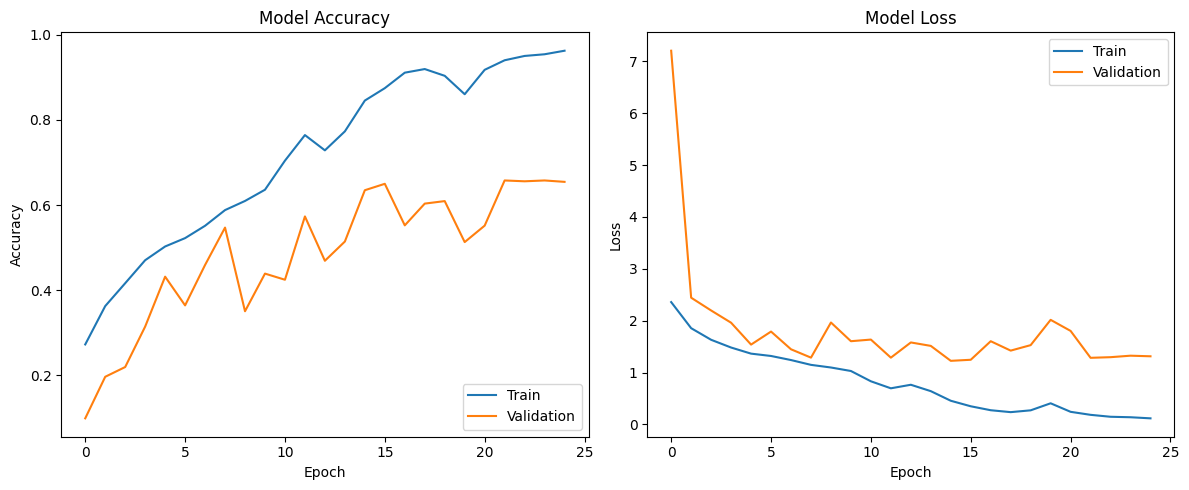

Final training accuracy: 0.9628
Final validation accuracy: 0.6544


In [ ]:
# Training
# Define callbacks for training
callbacks = [
    # Save the best model based on validation accuracy
    tf.keras.callbacks.ModelCheckpoint(
        filepath='waste_segragation_model_best.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    # Early stopping to prevent overfitting
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    # Reduce learning rate when a metric has stopped improving
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
]


# Train the model
batch_size = 32
epochs = 50

history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    verbose=1
)

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

# Print final training and validation accuracy
print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")



### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

Evaluating model on validation dataset...
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6381 - loss: 1.2186

Model Evaluation Metrics:
loss: 1.2266
compile_metrics: 0.6348
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

Classification Report:
              precision    recall  f1-score   support

   Cardboard       0.58      0.81      0.67       108
  Food_Waste       0.65      0.66      0.66       200
       Glass       0.44      0.75      0.56       150
       Metal       0.76      0.49      0.60       200
       Other       0.60      0.60      0.60       202
       Paper       0.64      0.46      0.53       206
     Plastic       0.74      0.70      0.72       459

    accuracy                           0.63      1525
   macro avg       0.63      0.64      0.62      1525
weighted avg       0.66      0.63      0.63      1525

------------------------------------------------------------------------------------------------------------------------------------------------------


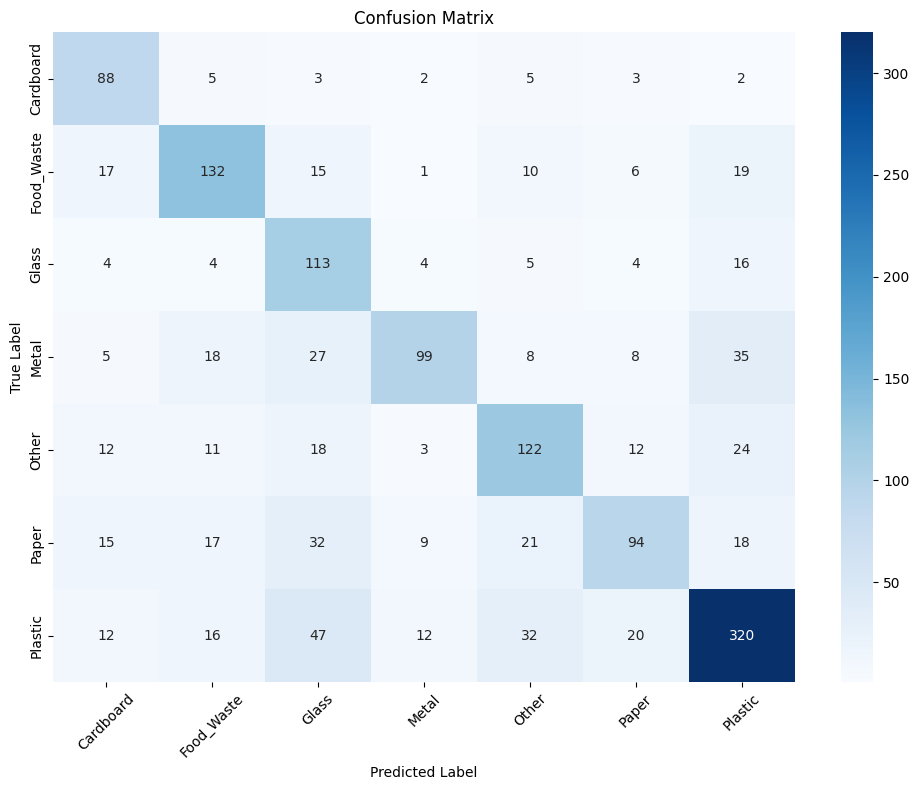

------------------------------------------------------------------------------------------------------------------------------------------------------


<ipython-input-25-c3f5cf16c962>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=per_class_accuracy, palette='viridis')


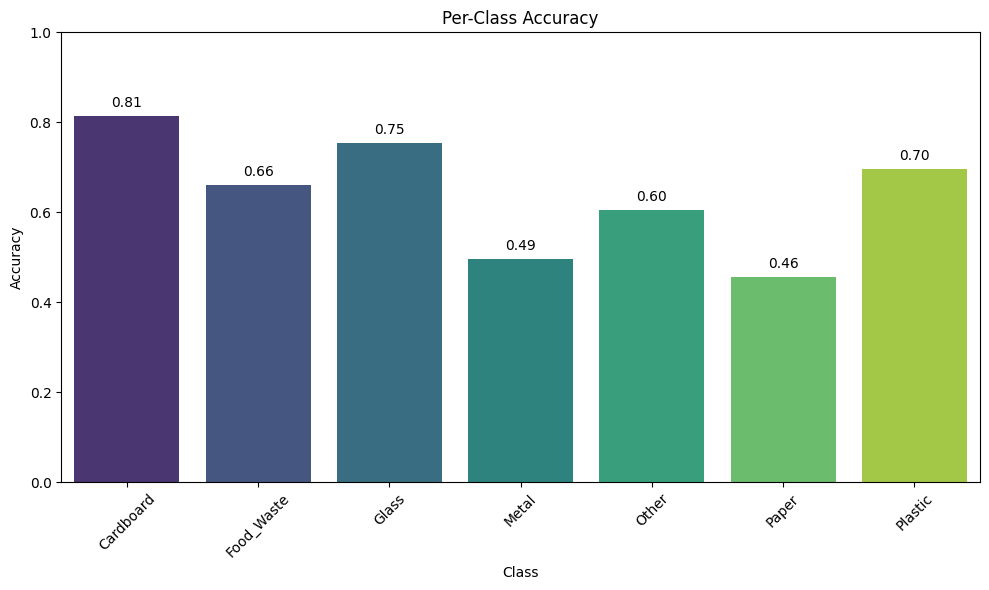

-----------------------------------------------------------------------------------------------------------------------------------------------------


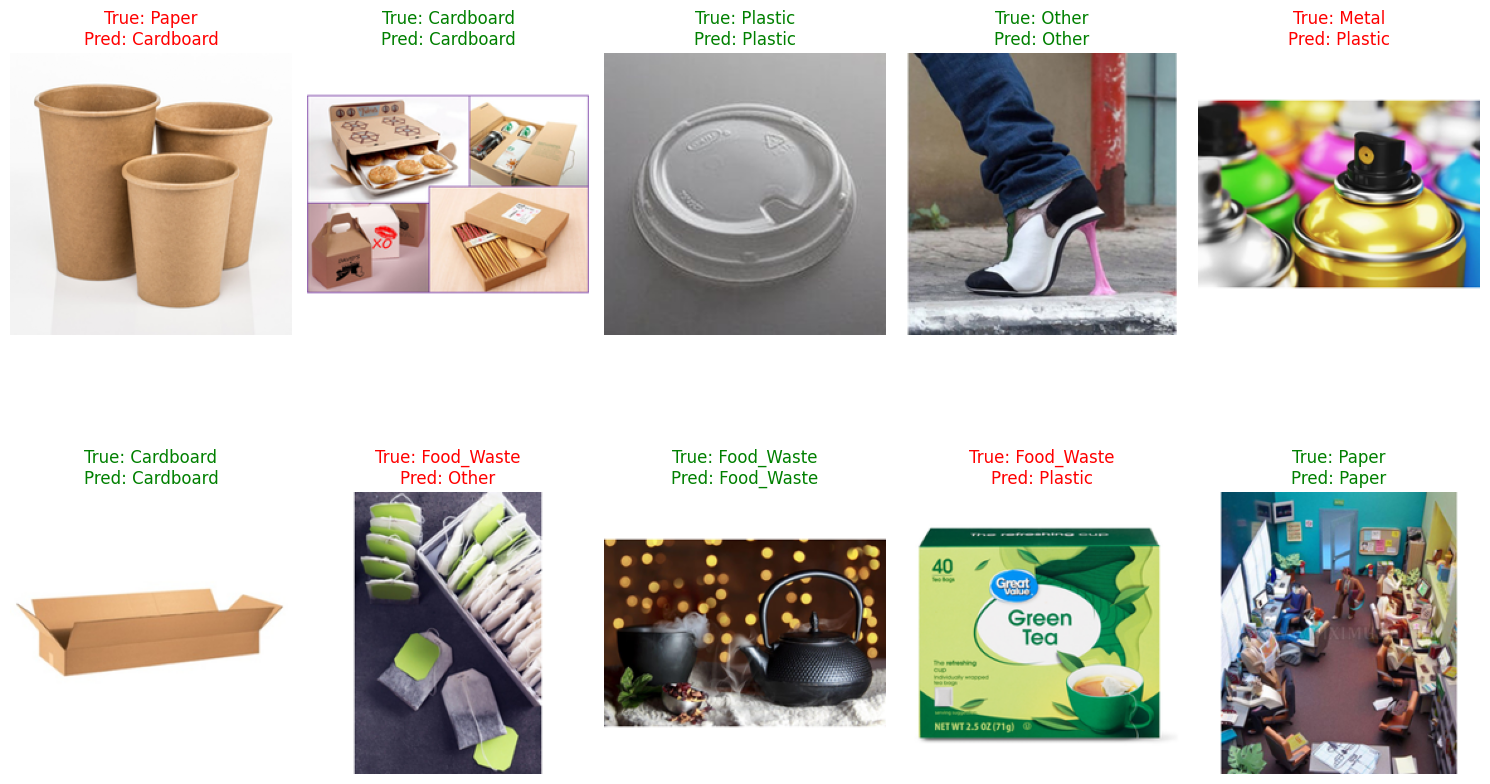

In [ ]:
# Evaluate on the test set; display suitable metric
# Evaluate the model on the validation dataset
print("Evaluating model on validation dataset...")
evaluation = model.evaluate(X_val, y_val, verbose=1)

# Print evaluation metrics
print("\nModel Evaluation Metrics:")
for metric_name, metric_value in zip(model.metrics_names, evaluation):
    print(f"{metric_name}: {metric_value:.4f}")

# Get predictions for validation set
y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_val, axis=1)

# Generate classification report
print("\nClassification Report:")
class_names = list(class_mapping.keys())
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

print("------------------------------------------------------------------------------------------------------------------------------------------------------")
# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("------------------------------------------------------------------------------------------------------------------------------------------------------")
# Calculate per-class accuracy
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=per_class_accuracy, palette='viridis')
plt.title('Per-Class Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Class')
plt.xticks(rotation=45)
plt.ylim(0, 1)
for i, acc in enumerate(per_class_accuracy):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center')
plt.tight_layout()
plt.show()

print("-----------------------------------------------------------------------------------------------------------------------------------------------------")
# Visualize some predictions
num_samples = 10
random_indices = np.random.choice(len(X_val), num_samples, replace=False)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_val[idx])
    true_class = class_names[y_true[idx]]
    pred_class = class_names[y_pred[idx]]
    title_color = 'green' if true_class == pred_class else 'red'
    plt.title(f"True: {true_class}\nPred: {pred_class}", color=title_color)
    plt.axis('off')
plt.tight_layout()
plt.show()



## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images




In [ ]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

## Conclusions and Insights

### Data Findings
- The dataset comprises 7 waste categories: Cardboard, Food Waste, Glass, Metal, Other, Paper, and Plastic.

- A noticeable class imbalance exists — Plastic is the most represented category, while Cardboard and others have significantly fewer samples.

- All images were successfully standardized to 224×224×3 dimensions, ensuring consistent input across the model.

- The dataset covers a good range of waste materials; however, visual similarity between certain categories (e.g., Paper vs Cardboard) poses classification challenges.


### Model Performance

- The trained CNN model achieved a validation accuracy of 63.48%, indicating a strong starting point with scope for improvement.

- Class-wise performance varied:

    * Plastic showed the best results with a 72% F1-score

    * Cardboard followed with a 67% F1-score

    * Lower performance observed for Paper (53% F1-score) and Glass (56% F1-score)

- The model had high recall for Cardboard (81%) and Glass (75%), meaning it was effective at identifying those categories when present.

- Metal achieved a high precision (76%), but a lower recall (49%), suggesting that while Metal predictions were accurate, many actual Metal instances were missed.



### Key Insights

1. Imbalanced class distribution likely influenced overall accuracy and per-class performance.

2. Visually distinct items (e.g., plastic bottles) were more reliably identified by the model.

3. Overlapping visual characteristics (like Paper vs Cardboard) reduced classification accuracy.

4. The current CNN architecture provides a strong baseline, but optimization is needed for improved generalization.



### Future Improvements

1. Introduce data augmentation techniques to reduce class imbalance and improve model robustness.

2. Leverage transfer learning using pre-trained models like ResNet, MobileNet, or EfficientNet to improve accuracy and training efficiency.

3. Optimize hyperparameters (e.g., learning rate, dropout, batch size) and experiment with deeper architectures.

4. Investigate ensemble techniques (e.g., combining multiple models) to enhance predictive performance.

5. Expand the dataset, particularly for underrepresented classes like Cardboard and Other, to improve balance and accuracy.